<a href="https://colab.research.google.com/github/nadaz10/multiclass-/blob/main/CSE_459_Deep_Learning_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Deep Learning - Lab 4:**

This tutorial is an introduction to Convolutional Neural Networks using TensorFlow 2.x Keras API. The dataset that we will work it is the MNIST dataset, a dataset of handwritten digits 0-9, and we will use a Sequential CNN to predict which digit was drawn.

This model reaches 99.3% accuracy.

In [ ]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.losses import CategoricalCrossentropy

In [ ]:
!pip install mnist
import mnist

In [ ]:
x_train = mnist.train_images()
y_train = mnist.train_labels()
x_test = mnist.test_images()
y_test = mnist.test_labels()

In [ ]:
np.isnan(x_train).any()


False

In [ ]:
np.isnan(x_train).any()


False

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
input_shape = (28, 28, 1)

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_train = x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_test = x_test/255.0

x_train.shape

(60000, 28, 28, 1)

In [ ]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

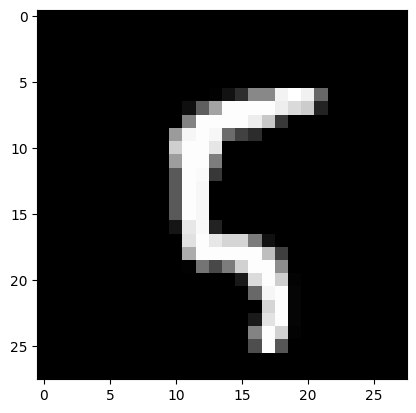

In [ ]:
plt.imshow(x_train[100][:,:,0],cmap='gray')#,cmap='grayscale' google greyscale in matplot
plt.show()

In [ ]:
print(y_train[100])

tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], shape=(10,), dtype=float32)


In [ ]:
batch_size = 64
num_classes = 10
epochs = 5

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=input_shape),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 64)        36928     
                                                      

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    callbacks=[callbacks])

Epoch 1/5
844/844 [==============================] - 362s 427ms/step - loss: 0.2280 - acc: 0.9303 - val_loss: 0.0520 - val_acc: 0.9857
Epoch 2/5
844/844 [==============================] - 364s 431ms/step - loss: 0.0871 - acc: 0.9748 - val_loss: 0.0358 - val_acc: 0.9897
Epoch 3/5
844/844 [==============================] - 362s 429ms/step - loss: 0.0642 - acc: 0.9805 - val_loss: 0.0308 - val_acc: 0.9925
Epoch 4/5
844/844 [==============================] - 365s 433ms/step - loss: 0.0536 - acc: 0.9844 - val_loss: 0.0318 - val_acc: 0.9917
Epoch 5/5
844/844 [==============================] - 363s 430ms/step - loss: 0.0458 - acc: 0.9864 - val_loss: 0.0245 - val_acc: 0.9935


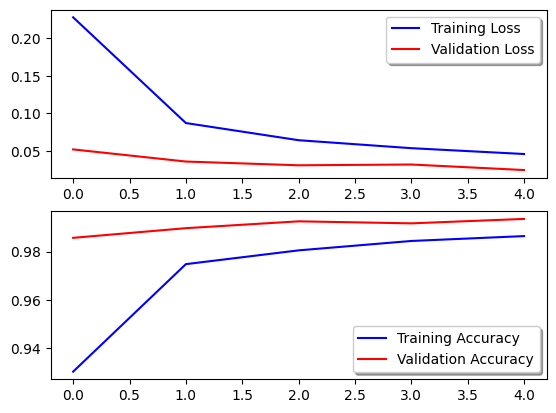

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 27s 88ms/step - loss: 0.0190 - acc: 0.9931


In [ ]:
# Predict the values from the testing dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert testing observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes)

313/313 [==============================] - 20s 62ms/step


<Axes: >

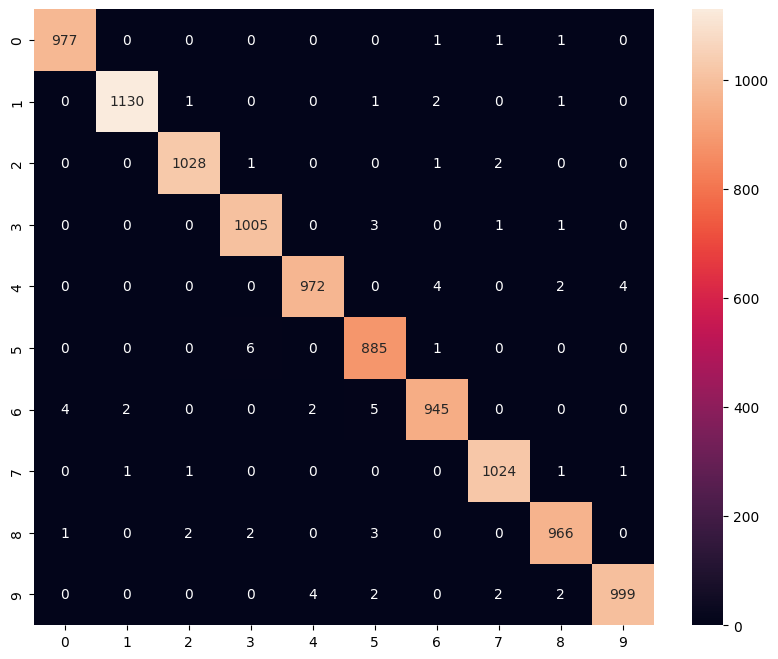

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')